In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *

In [2]:
# read in EAZY outputs
# only need 3rd, 6th, and 7th columns

data_UV = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.153-155.rf', 'r')
data_z = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.83.rf', 'r')
data_VJ = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.155-161.rf', 'r')
data_muzzin_UV = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.153-155.rf', 'r')
data_muzzin_VJ = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.155-161.rf', 'r')
lines_z = data_z.readlines()[10:]
lines_UV = data_UV.readlines()[11:]
lines_VJ = data_VJ.readlines()[11:]
lines_muzzin_UV = data_muzzin_UV.readlines()[11:]
lines_muzzin_VJ = data_muzzin_VJ.readlines()[11:]

# print(lines)

z = []
DM_UV = []
DM_z = []
DM_VJ = []
Ufilter_UV = []
Vfilter_UV = []
Ufilter_muzzin_UV = []
Vfilter_muzzin_UV = []
zfilter = []
Vfilter_VJ = []
Jfilter_VJ = []
Vfilter_muzzin_VJ = []
Jfilter_muzzin_VJ = []

for line in lines_UV:
    p = line.split()
    z.append(float(p[1]))
#     redshift_UV.append(float(p[1]))
    DM_UV.append(float(p[2]))
    Ufilter_UV.append(float(p[5]))
    Vfilter_UV.append(float(p[6]))
    
for line in lines_muzzin_UV:
    p = line.split()
#     z.append(float(p[1]))
#     redshift_UV.append(float(p[1]))
#     DM_UV.append(float(p[2]))
    Ufilter_muzzin_UV.append(float(p[5]))
    Vfilter_muzzin_UV.append(float(p[6]))
    
for line in lines_z:
    q = line.split()
#     redshift_z.append(float())
    DM_z.append(float(q[2]))
    zfilter.append(float(q[5]))
    
for line in lines_VJ:
    r = line.split()
#     redshift_z.append(float())
    DM_VJ.append(float(r[2]))
    Vfilter_VJ.append(float(r[5]))
    Jfilter_VJ.append(float(r[6]))
    
for line in lines_muzzin_VJ:
    r = line.split()
#     redshift_z.append(float())
#     DM_VJ.append(float(r[2]))
    Vfilter_muzzin_VJ.append(float(r[5]))
    Jfilter_muzzin_VJ.append(float(r[6]))
    

zspec = np.array(z)
DMarr_UV = np.array(DM_UV)
DMarr_z = np.array(DM_z)
DMarr_VJ = np.array(DM_VJ)
zflux = np.array(zfilter)
Uflux_UV = np.array(Ufilter_UV)
Vflux_UV = np.array(Vfilter_UV)
Uflux_muzzin_UV = np.array(Ufilter_muzzin_UV)
Vflux_muzzin_UV = np.array(Vfilter_muzzin_UV)
Vflux_VJ = np.array(Vfilter_VJ)
Jflux_VJ = np.array(Jfilter_VJ)
Vflux_muzzin_VJ = np.array(Vfilter_muzzin_VJ)
Jflux_muzzin_VJ = np.array(Jfilter_muzzin_VJ)


# UltraVISTA apparent magnitudes

from astropy.io import ascii
data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")  
# print(data_cat)   

# print(len(data_cat['gp']))
zp = data_cat['zp']
use = data_cat['USE']
star = data_cat['star']
contamination = data_cat['contamination']
nan_contam = data_cat['nan_contam']
# z = data_cat['z_spec']

cut = np.where((use == 1.) & (star == 0.) & (contamination == 0.) & (nan_contam < 3.)) # & (Uflux > 0.) & (Vflux > 0.) & (zflux > 0.)) # & (zp > 0.))

zmag = np.array(25. - 2.5 * np.log10(zp[cut]))
# print(len(zmag))
# print(len(zp))

print(len(zflux))
print(len(zflux[cut]))
print(type(zmag))

# plt.hist(zmag[np.where(zmag > 0)])
# plt.show()
# print(len(zmag[np.where(zmag < 0.)]))

262615
166641
<class 'numpy.ndarray'>


/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in log10


In [8]:
# Calculate (U-V) color and rest frame Vmag

# K correction
K_correct = -2.5*np.log10((1. + zspec[cut])**-1.)

# (U-V) color
UVcolor = -2.5*np.log10(Uflux_UV[cut]/Vflux_UV[cut])
VJcolor = -2.5*np.log10(Vflux_VJ[cut]/Jflux_VJ[cut])

UVcolor_muzzin = -2.5*np.log10(Uflux_muzzin_UV[cut]/Vflux_muzzin_UV[cut])
VJcolor_muzzin = -2.5*np.log10(Vflux_muzzin_VJ[cut]/Jflux_muzzin_VJ[cut])

# Absolute magnitude
MV = -2.5*np.log10(Vflux_UV[cut]) + 25. - DMarr_UV[cut] - K_correct
MU = -2.5*np.log10(Uflux_UV[cut]) + 25. - DMarr_UV[cut] - K_correct
zMag = -2.5*np.log10(zflux[cut]) + 25. - DMarr_z[cut] - K_correct
# MJ = -2.5*np.log10(Jflux[cut]) + 25. - DMarr_J[cut] - K_correct

# V band magnitude of the sun
Msun_V = 4.80 # AB magnitude

# Luminosity
LV = 10.**((MV-Msun_V)/(-2.5))

log_LV = np.log10(LV)


# Calculate rest frame zmag

Msun_z = 4.50

zMag = -2.5*np.log10(zflux[cut]) + 25. - DMarr_z[cut] - K_correct
zLum = 10.**((zMag-Msun_z)/(-2.5))

log_zLum = np.log10(zLum)

print(type(log_LV))
print(type(log_zLum))

# print(log_zLum[np.where(log_zLum != 'nan')])
# print(log_LV[np.where(log_LV != 'nan')])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10


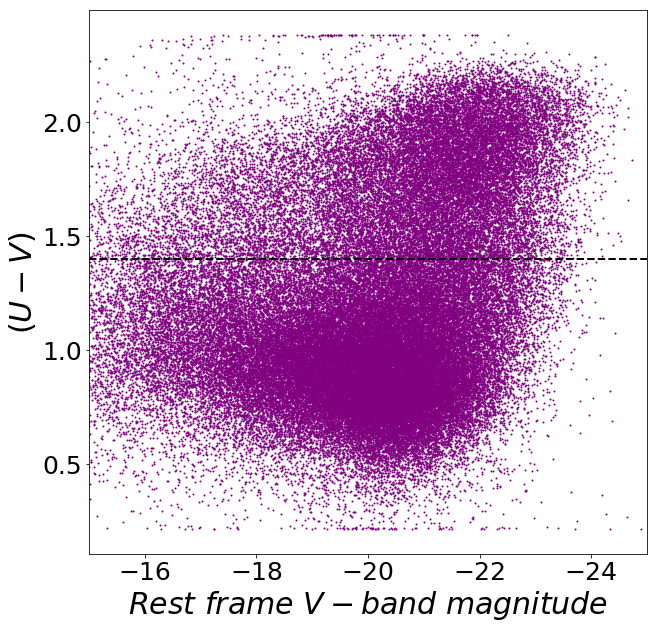

In [43]:
# Plot (U-V) vs. V

zphot = zspec[np.where((Uflux_UV > 0) & (Vflux_UV > 0) & (use == 1) & (zspec > 0.1))]

f, ax = plt.subplots(figsize=(10,10))
# ax.scatter(MV[np.where((zphot < 1))], UVcolor[np.where(zphot < 1)], s=1, c='purple')
ax.scatter(MV[np.where(zspec[cut] < 1)], UVcolor[np.where(zspec[cut] < 1)], s=1, c='purple')
# plt.title("UVista (U-V) vs V (z < 1)", fontsize=22)
plt.xlabel(r'$Rest$ $frame$ $V-band$ $magnitude$', fontsize=30)
plt.ylabel(r'$(U-V)$', fontsize=30)
plt.xlim(-25, -15)
plt.axhline(y=1.4, color='black', linewidth=2, ls='--')
plt.tick_params(axis='both', which='major', labelsize=25)
plt.gca().invert_xaxis()
# plt.legend(loc='lower right', fontsize=15, markerscale=5)
# plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v5.jpeg')
plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/U-V_CMD-v7.pdf')
plt.show()


# # Plot redshift distribution

# f, ax = plt.subplots(figsize=(10,10))
# ax.hist(zphot, bins=50, color='purple')
# plt.title("UVista Redshift Distribution", fontsize=22)
# plt.xlabel(r'$redshift$', fontsize=20)
# plt.ylabel(r'$counts$', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.gca().invert_xaxis()
# # plt.legend(loc='lower right', fontsize=15, markerscale=5)
# plt.savefig('/Users/mtownsend/Desktop/UV_redshift_dist-v1.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/UV_redshift_dist-v1.pdf')
# plt.show()

# Plot UVJ

# print(len(VJcolor[np.where(VJcolor == 0)]))
# print(len(VJcolor[np.where(VJcolor > 0)]))

# f, ax = plt.subplots(figsize=(10,10))
# # ax.scatter(MV[np.where((zphot < 1))], UVcolor[np.where(zphot < 1)], s=1, c='purple')
# ax.scatter(VJcolor, UVcolor, s=1, c='purple')
# plt.title("UVista (U-V) vs (V-J))", fontsize=22)
# plt.xlabel(r'$(V-J)$', fontsize=20)
# plt.ylabel(r'$(U-V)$', fontsize=20)
# # plt.xlim(-0.5, 2.)
# # plt.ylim(0., 2.5)
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.gca().invert_xaxis()
# # plt.legend(loc='lower right', fontsize=15, markerscale=5)
# # plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v5.jpeg')
# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/U-V_CMD-v6.pdf')
# plt.show()

# f, ax = plt.subplots(figsize=(10,10))
# # ax.scatter(MV[np.where((zphot < 1))], UVcolor[np.where(zphot < 1)], s=1, c='purple')
# ax.scatter(VJcolor_muzzin, UVcolor_muzzin, s=1, c='purple')
# plt.title("UVista (U-V) vs (V-J))", fontsize=22)
# plt.xlabel(r'$(V-J)$', fontsize=20)
# plt.ylabel(r'$(U-V)$', fontsize=20)
# # plt.xlim(-0.5, 2.)
# # plt.ylim(0., 2.5)
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.gca().invert_xaxis()
# # plt.legend(loc='lower right', fontsize=15, markerscale=5)
# # plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v5.jpeg')
# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/U-V_CMD-v6.pdf')
# plt.show()

/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


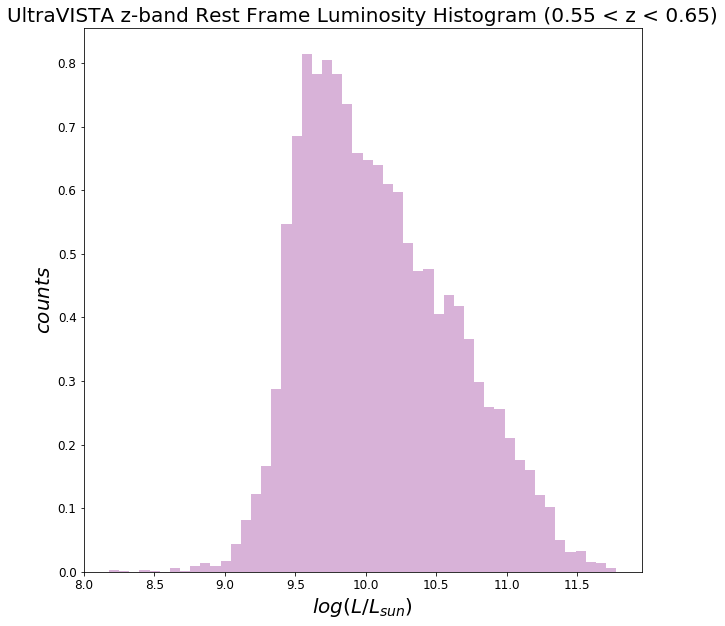

In [4]:
plt.subplots(figsize=(10,10))
# plt.hist(log_LV[np.where((zspec[cut] > 0.55) & (zspec[cut] < 0.65))], bins=50, alpha=0.3, color='purple', label="0.55<z<0.65", normed='True')
plt.hist(log_zLum[np.where((zspec[cut] > 0.55) & (zspec[cut] < 0.65))], bins=50, alpha=0.3, color='purple', label="0.55<z<0.65", normed='True')
plt.title("UltraVISTA z-band Rest Frame Luminosity Histogram (0.55 < z < 0.65)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/UV_zlum_hist_redshift_cut-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/UV_zlum_hist_redshift_cut-v1.pdf')
plt.show()

# plt.scatter(log_zLum, zspec[cut])
# plt.show()


<class 'numpy.ndarray'>
166641
29430


/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


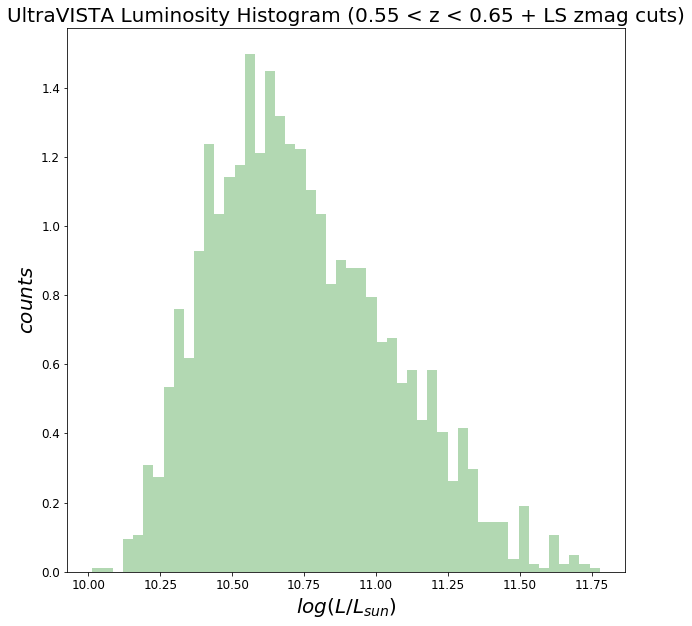

In [5]:
print(type(zmag))
print(len(log_zLum))
print(len(zmag[np.where(zmag < 22.36)]))

plt.subplots(figsize=(10,10))
# plt.hist(log_LV[np.where((zmag < 22.36) & (zphot > 0.55) & (zphot < 0.65))], bins=50, alpha=0.3, color='green', label="0.55<z<0.65 + LS zmag cuts", normed='True')
plt.hist(log_zLum[np.where((zspec[cut] > 0.55) & (zspec[cut] < 0.65) & (zmag < 22.36))], bins=50, alpha=0.3, color='green', normed='True')
plt.title("UltraVISTA Luminosity Histogram (0.55 < z < 0.65 + LS zmag cuts)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/UV_zlum_hist_redshift_LSzmag_cut-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/UV_zlum_hist_redshift_LSzmag_cut-v1.pdf')
plt.show()


/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


[ 8.17805575  8.25004527  8.32203478  8.3940243   8.46601381  8.53800333
  8.60999284  8.68198236  8.75397187  8.82596139  8.8979509   8.96994042
  9.04192993  9.11391945  9.18590896  9.25789848  9.32988799  9.40187751
  9.47386702  9.54585654  9.61784605  9.68983557  9.76182508  9.8338146
  9.90580411  9.97779363 10.04978314 10.12177266 10.19376217 10.26575169
 10.3377412  10.40973072 10.48172023 10.55370975 10.62569926 10.69768878
 10.76967829 10.84166781 10.91365732 10.98564684 11.05763635 11.12962587
 11.20161538 11.2736049  11.34559441 11.41758393 11.48957344 11.56156296
 11.63355247 11.70554199 11.77753151]
----
[0.         0.                nan 0.         0.                nan
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00268817 0.00271739 0.05128205 0.16326531 0.36363636
 0.52941176 0.75182482 0.85407725 0.924      0.96666667 1.
 0.9

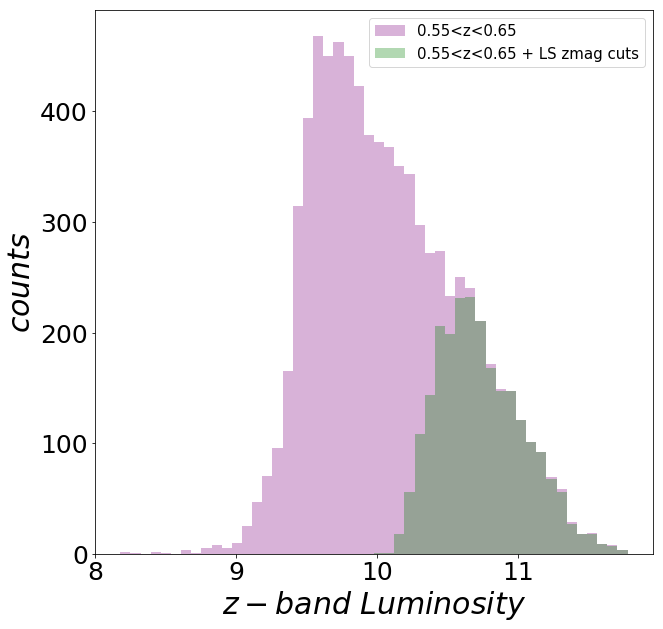

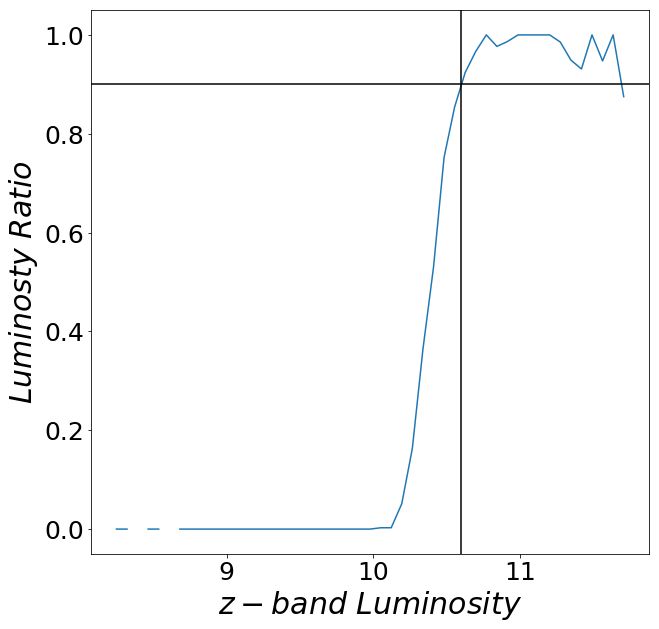

In [16]:
# Make completeness cuts in the z-band for combined red and blue sources

UV_zcut_all, zcut_bins_all = np.histogram(log_zLum[np.where((zspec[cut] > 0.55) & (zspec[cut] < 0.65))], bins=50)
UV_LScut_all, nouse_bins = np.histogram(log_zLum[np.where((zspec[cut] > 0.55) & (zspec[cut] < 0.65) & (zmag < 22.36))], bins=zcut_bins_all)
print(zcut_bins_all)
print('----')
# print(LScut_bins)

ratio_all = UV_LScut_all/UV_zcut_all
print(ratio_all)

plt.subplots(figsize=(10,10))
plt.hist(log_zLum[np.where((zspec[cut] > 0.55) & (zspec[cut] < 0.65))], bins=zcut_bins_all, alpha=0.3, color='purple', label="0.55<z<0.65")
plt.hist(log_zLum[np.where((zspec[cut] > 0.55) & (zspec[cut] < 0.65) & (zmag < 22.36))], bins=zcut_bins_all, alpha=0.3, color='green', label="0.55<z<0.65 + LS zmag cuts")
# plt.title("UltraVISTA z-band Luminosity Histogram (all)", fontsize=20)
plt.xlabel(r'$z-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$counts$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_z_notNormalized_all-v4.jpeg')
plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/lum_hist_UVandUVzcut_z_notNormalized_all-v1.pdf')
plt.show()

bins_minus_one = [8.25004527,  8.32203478,  8.3940243,   8.46601381,  8.53800333,
  8.60999284,  8.68198236,  8.75397187,  8.82596139,  8.8979509,   8.96994042,
  9.04192993,  9.11391945,  9.18590896,  9.25789848,  9.32988799,  9.40187751,
  9.47386702,  9.54585654,  9.61784605,  9.68983557,  9.76182508,  9.8338146,
  9.90580411,  9.97779363, 10.04978314, 10.12177266, 10.19376217, 10.26575169,
 10.3377412,  10.40973072, 10.48172023, 10.55370975, 10.62569926, 10.69768878,
 10.76967829, 10.84166781, 10.91365732, 10.98564684, 11.05763635, 11.12962587,
 11.20161538, 11.2736049,  11.34559441, 11.41758393, 11.48957344, 11.56156296,
 11.63355247, 11.70554199]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_all[:-1])
plt.axhline(y=0.9, color='black')
plt.axvline(x=10.6, color='black')
# plt.title("UV z-band with LS cuts / UV with Redshift Cuts vs L/L_sun (all)", fontsize=20)
plt.xlabel(r'$z-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$Luminosty$ $Ratio$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_all-v4.jpeg')
plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/luminosity_hist_ratio_all-v4.pdf')
fig.show()

In [44]:
# zLum_cut = log_zLum[cut]

log_zLum_blue_LS = log_zLum[np.where((UVcolor < 1.4) & (zspec[cut] > 0.55) & (zspec[cut] < 0.65) & (zmag < 22.36))]
log_zLum_red_LS = log_zLum[np.where((UVcolor > 1.4) & (zspec[cut] > 0.55) & (zspec[cut] < 0.65) & (zmag < 22.36))]

log_zLum_blue_z = log_zLum[np.where((UVcolor < 1.4) & (zspec[cut] > 0.55) & (zspec[cut] < 0.65))]
log_zLum_red_z = log_zLum[np.where((UVcolor > 1.4) & (zspec[cut] > 0.55) & (zspec[cut] < 0.65))]
   
    
print(len(log_zLum_blue_LS))
print(len(log_zLum_red_LS))
print(len(log_zLum_blue_z))
print(len(log_zLum_red_z))

1157
1231
5700
2288


/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


[ 8.78741914  8.84627288  8.90512662  8.96398035  9.02283409  9.08168782
  9.14054156  9.19939529  9.25824903  9.31710277  9.3759565   9.43481024
  9.49366397  9.55251771  9.61137145  9.67022518  9.72907892  9.78793265
  9.84678639  9.90564013  9.96449386 10.0233476  10.08220133 10.14105507
 10.1999088  10.25876254 10.31761628 10.37647001 10.43532375 10.49417748
 10.55303122 10.61188496 10.67073869 10.72959243 10.78844616 10.8472999
 10.90615364 10.96500737 11.02386111 11.08271484 11.14156858 11.20042231
 11.25927605 11.31812979 11.37698352 11.43583726 11.49469099 11.55354473
 11.61239847 11.6712522  11.73010594]
----
[0.         0.                nan        nan 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01408451
 0.01470588 0.05970149 0.2        0.37037037 0.57971014 0.79545455
 0.86734694 0.94059406 0.96842105 0.97       0.98780488 1.
 0.9

/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


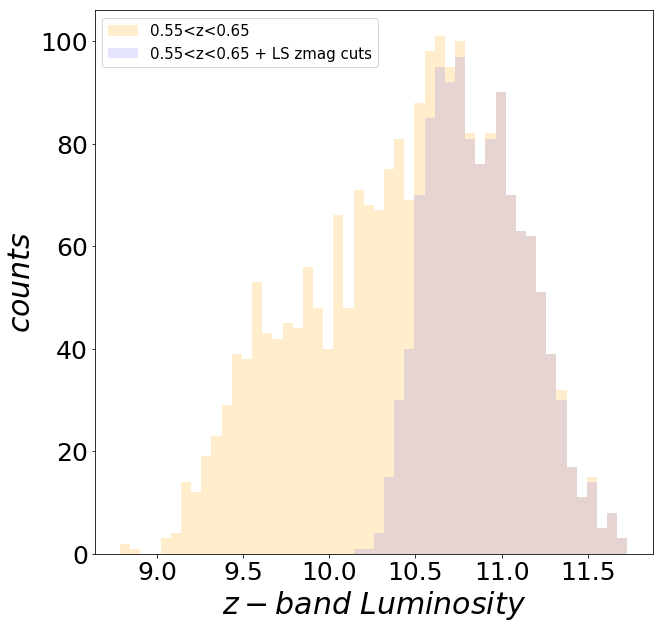

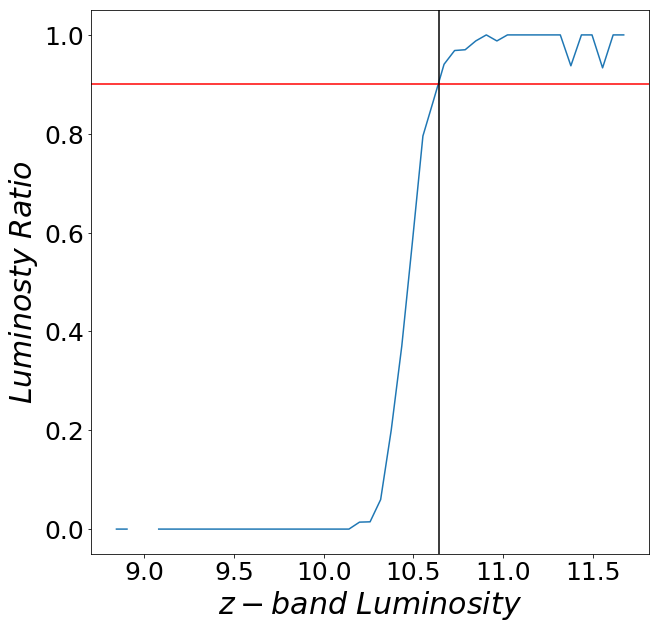

In [46]:
UV_zcut_red, zcut_bins_red = np.histogram(log_zLum_red_z, bins=50)
UV_LScut_red, nouse_bins = np.histogram(log_zLum_red_LS, bins=zcut_bins_red)
print(zcut_bins_red)
print('----')
# print(LScut_bins)

ratio_red = UV_LScut_red/UV_zcut_red
print(ratio_red)

plt.subplots(figsize=(10,10))
plt.hist(log_zLum_red_z, bins=zcut_bins_red, alpha=0.2, color='orange', label="0.55<z<0.65")
plt.hist(log_zLum_red_LS, bins=zcut_bins_red, alpha=0.1, color='blue', label="0.55<z<0.65 + LS zmag cuts")
# plt.title("UltraVISTA z-band Luminosity Histogram (red)", fontsize=20)
plt.xlabel(r'$z-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$counts$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(loc='upper left', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_V_Normalized_red-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/lum_hist_UVandUVzcut_z_notNormalized_red-v2.pdf')
plt.show()

bins_minus_one = [8.84627288,  8.90512662,  8.96398035,  9.02283409,  9.08168782,
  9.14054156,  9.19939529,  9.25824903,  9.31710277,  9.3759565,   9.43481024,
  9.49366397,  9.55251771,  9.61137145,  9.67022518,  9.72907892,  9.78793265,
  9.84678639,  9.90564013,  9.96449386, 10.0233476,  10.08220133, 10.14105507,
 10.1999088,  10.25876254, 10.31761628, 10.37647001, 10.43532375, 10.49417748,
 10.55303122, 10.61188496, 10.67073869, 10.72959243, 10.78844616, 10.8472999,
 10.90615364, 10.96500737, 11.02386111, 11.08271484, 11.14156858, 11.20042231,
 11.25927605, 11.31812979, 11.37698352, 11.43583726, 11.49469099, 11.55354473,
 11.61239847, 11.6712522]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_red[:-1])
plt.axhline(y=0.9, color='red')
plt.axvline(x=10.64, color='black')
# plt.title("UV z-band with LS cuts / UV with Redshift Cuts vs L/L_sun (red)", fontsize=20)
plt.xlabel(r'$z-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$Luminosty$ $Ratio$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_red-v4.jpeg')
plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/luminosity_hist_ratio_red-v4.pdf')
fig.show()

[ 8.17805575  8.25004527  8.32203478  8.3940243   8.46601381  8.53800333
  8.60999284  8.68198236  8.75397187  8.82596139  8.8979509   8.96994042
  9.04192993  9.11391945  9.18590896  9.25789848  9.32988799  9.40187751
  9.47386702  9.54585654  9.61784605  9.68983557  9.76182508  9.8338146
  9.90580411  9.97779363 10.04978314 10.12177266 10.19376217 10.26575169
 10.3377412  10.40973072 10.48172023 10.55370975 10.62569926 10.69768878
 10.76967829 10.84166781 10.91365732 10.98564684 11.05763635 11.12962587
 11.20161538 11.2736049  11.34559441 11.41758393 11.48957344 11.56156296
 11.63355247 11.70554199 11.77753151]
----
[0.         0.                nan 0.         0.                nan
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00316456 0.00344828 0.0620438  0.20912548 0.46478873
 0.6954023  0.83870968 0.9375     0.96946565 0.99145299 1.
 1. 

/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


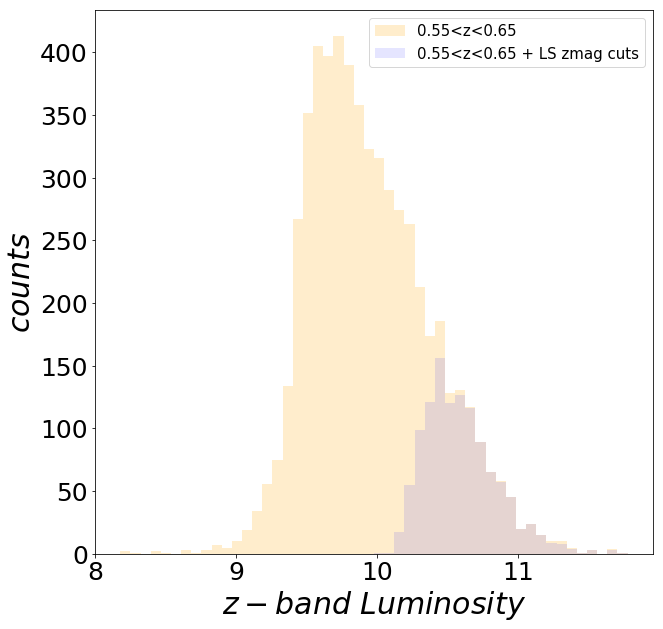

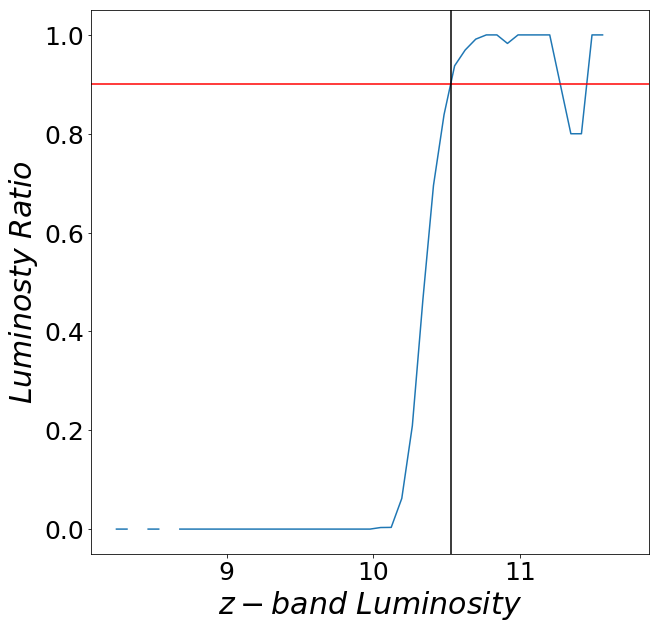

In [48]:
UV_zcut_blue, zcut_bins_blue = np.histogram(log_zLum_blue_z, bins=50)
UV_LScut_blue, nouse_bins = np.histogram(log_zLum_blue_LS, bins=zcut_bins_blue)
print(zcut_bins_blue)
print('----')
# print(LScut_bins)

ratio_blue = UV_LScut_blue/UV_zcut_blue
print(ratio_blue)

plt.subplots(figsize=(10,10))
plt.hist(log_zLum_blue_z, bins=zcut_bins_blue, alpha=0.2, color='orange', label="0.55<z<0.65")
plt.hist(log_zLum_blue_LS, bins=zcut_bins_blue, alpha=0.1, color='blue', label="0.55<z<0.65 + LS zmag cuts")
# plt.title("UltraVISTA z-band Luminosity Histogram (blue)", fontsize=20)
plt.xlabel(r'$z-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$counts$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_V_Normalized_red-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/lum_hist_UVandUVzcut_z_notNormalized_blue-v2.pdf')
plt.show()

bins_minus_one = [8.25004527,  8.32203478,  8.3940243,   8.46601381,  8.53800333,
  8.60999284,  8.68198236,  8.75397187,  8.82596139,  8.8979509,   8.96994042,
  9.04192993,  9.11391945,  9.18590896,  9.25789848,  9.32988799,  9.40187751,
  9.47386702,  9.54585654,  9.61784605,  9.68983557,  9.76182508,  9.8338146,
  9.90580411,  9.97779363, 10.04978314, 10.12177266, 10.19376217, 10.26575169,
 10.3377412,  10.40973072, 10.48172023, 10.55370975, 10.62569926, 10.69768878,
 10.76967829, 10.84166781, 10.91365732, 10.98564684, 11.05763635, 11.12962587,
 11.20161538, 11.2736049,  11.34559441, 11.41758393, 11.48957344, 11.56156296,
 11.63355247, 11.70554199]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_blue[:-1])
plt.axhline(y=0.9, color='red')
plt.axvline(x=10.53, color='black')
# plt.title("UV z-band with LS cuts / UV with Redshift Cuts vs L/L_sun (blue)", fontsize=20)
plt.xlabel(r'$z-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$Luminosty$ $Ratio$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_red-v4.jpeg')
plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/luminosity_hist_ratio_blue-v4.pdf')
fig.show()

In [ ]:
UV_zcut_all, zcut_bins_all = np.histogram(log_LV[np.where((zphot > 0.55) & (zphot < 0.65))], bins=50)
UV_LScut_all, nouse_bins = np.histogram(log_LV[np.where((zmag < 22.36) & (zphot > 0.55) & (zphot < 0.65))], bins=zcut_bins_all)
print(zcut_bins_all)
print('----')
# print(LScut_bins)

ratio_all = UV_LScut_all/UV_zcut_all
print(ratio_all)

plt.subplots(figsize=(10,10))
plt.hist(log_LV[np.where((zphot > 0.55) & (zphot < 0.65))], bins=zcut_bins_all, alpha=0.2, color='orange', label="0.55<z<0.65")
plt.hist(log_LV[np.where((zmag < 22.36) & (zphot > 0.55) & (zphot < 0.65))], bins=zcut_bins_all, alpha=0.1, color='blue', label="0.55<z<0.65 + LS zmag cuts")
plt.title("UltraVISTA Luminosity Histogram (all)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_V_notNormalized_all-v3.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_V_notNormalized_all-v3.pdf')
plt.show()

bins_minus_one = [7.72880458,  7.83848155,  7.94815852,  8.05783549,  8.16751245,
  8.27718942,  8.38686639,  8.49654336,  8.60622032,  8.71589729,  8.82557426,
  8.93525123,  9.0449282,   9.15460516,  9.26428213,  9.3739591,   9.48363607,
  9.59331303,  9.70299,     9.81266697,  9.92234394, 10.0320209,  10.14169787,
 10.25137484, 10.36105181, 10.47072877, 10.58040574, 10.69008271, 10.79975968,
 10.90943665, 11.01911361, 11.12879058, 11.23846755, 11.34814452, 11.45782148,
 11.56749845, 11.67717542, 11.78685239, 11.89652935, 12.00620632, 12.11588329,
 12.22556026, 12.33523723, 12.44491419, 12.55459116, 12.66426813, 12.7739451,
 12.88362206, 12.99329903]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_all[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (all)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_all-v3.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_all-v3.pdf')
fig.show()

In [ ]:
log_LV_blue_LS = log_LV[np.where((UVcolor < 1.3) & (zphot > 0.55) & (zphot < 0.65) & (zmag < 22.36))]
log_LV_red_LS = log_LV[np.where((UVcolor > 1.3) & (zphot > 0.55) & (zphot < 0.65) & (zmag < 22.36))]

log_LV_blue_z = log_LV[np.where((UVcolor < 1.3) & (zphot > 0.55) & (zphot < 0.65))]
log_LV_red_z = log_LV[np.where((UVcolor > 1.3) & (zphot > 0.55) & (zphot < 0.65))]
   
    
print(len(log_LV_blue_LS))
print(len(log_LV_red_LS))
print(len(log_LV_blue_z))
print(len(log_LV_red_z))

In [ ]:
UV_zcut_red, zcut_bins_red = np.histogram(log_LV_red_z, bins=50)
UV_LScut_red, nouse_bins = np.histogram(log_LV_red_LS, bins=zcut_bins_red)
print(zcut_bins_red)
print('----')
# print(LScut_bins)

ratio_red = UV_LScut_red/UV_zcut_red
print(ratio_red)

plt.subplots(figsize=(10,10))
plt.hist(log_LV_red_z, bins=zcut_bins_red, alpha=0.2, color='orange', label="0.55<z<0.65")
plt.hist(log_LV_red_LS, bins=zcut_bins_red, alpha=0.1, color='blue', label="0.55<z<0.65 + LS zmag cuts")
plt.title("UltraVISTA Luminosity Histogram (red)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_V_Normalized_red-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_V_Normalized_red-v2.pdf')
plt.show()

bins_minus_one = [7.75760615,  7.86669533,  7.97578451,  8.08487369,  8.19396287,
  8.30305205,  8.41214123,  8.52123041,  8.63031959,  8.73940877,  8.84849795,
  8.95758713,  9.06667632,  9.1757655,   9.28485468,  9.39394386,  9.50303304,
  9.61212222,  9.7212114,   9.83030058,  9.93938976, 10.04847894, 10.15756812,
 10.2666573,  10.37574648, 10.48483566, 10.59392484, 10.70301402, 10.81210321,
 10.92119239, 11.03028157, 11.13937075, 11.24845993, 11.35754911, 11.46663829,
 11.57572747, 11.68481665, 11.79390583, 11.90299501, 12.01208419, 12.12117337,
 12.23026255, 12.33935173, 12.44844092, 12.5575301,  12.66661928, 12.77570846,
 12.88479764, 12.99388682]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_red[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (red)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_red-v3.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_red-v3.pdf')
fig.show()

In [ ]:
UV_zcut_blue, zcut_bins_blue = np.histogram(log_LV_blue_z, bins=50)
UV_LScut_blue, nouse_bins = np.histogram(log_LV_blue_LS, bins=zcut_bins_blue)
print(zcut_bins_blue)
print('----')
# print(LScut_bins)

ratio_blue = UV_LScut_blue/UV_zcut_blue
print(ratio_blue)

plt.subplots(figsize=(10,10))
plt.hist(log_LV_blue_z, bins=zcut_bins_blue, alpha=0.2, color='orange', label="0.55<z<0.65")
plt.hist(log_LV_blue_LS, bins=zcut_bins_blue, alpha=0.1, color='blue', label="0.55<z<0.65 + LS zmag cuts")
plt.title("UltraVISTA Luminosity Histogram (blue)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_V_notNormalized_blue-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_V_notNormalized_blue-v2.pdf')
plt.show()

bins_minus_one = [7.69987978,  7.78063195,  7.86138412,  7.94213629,  8.02288846,
  8.10364063,  8.18439279,  8.26514496,  8.34589713,  8.4266493,   8.50740147,
  8.58815364,  8.66890581,  8.74965797,  8.83041014,  8.91116231,  8.99191448,
  9.07266665,  9.15341882,  9.23417098,  9.31492315,  9.39567532,  9.47642749,
  9.55717966,  9.63793183,  9.718684,    9.79943616,  9.88018833,  9.9609405,
 10.04169267, 10.12244484, 10.20319701, 10.28394917, 10.36470134, 10.44545351,
 10.52620568, 10.60695785, 10.68771002, 10.76846218, 10.84921435, 10.92996652,
 11.01071869, 11.09147086, 11.17222303, 11.2529752,  11.33372736, 11.41447953,
 11.4952317,  11.57598387]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_blue[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (blue)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_blue-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_blue-v2.pdf')
fig.show()

In [ ]:
# UltraVISTA apparent magnitudes

from astropy.io import ascii
data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")  
# print(data_cat)   

# print(len(data_cat['gp']))
gp = data_cat['gp']
rp = data_cat['rp']
zp = data_cat['zp']
use = data_cat['USE']
# z = data_cat['z_spec']

cut = np.where((np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (zarr > 0.) & (use == 1))
cut0 = cut[0]
print(type(cut0))

gmag = 22.5 - 2.5 * np.log10(gp[cut])
rmag = 22.5 - 2.5 * np.log10(rp[cut])
zmag = 22.5 - 2.5 * np.log10(zp[cut])

zphot = zarr[cut]
# DMarr = np.array(DM)
DM_new = DMarr[cut]



In [ ]:
print(cut0.shape)
print(cut0)
print(cut0[2])

In [ ]:
# calculate rest-frame magnitudes

K_correct = -2.5*np.log10((1. + zphot)**-1.)
print(len(K_correct))
# print(len(zphot[np.where(zmag <= 22.36)]))
# print(len(rmag_LRG[np.where(zmag_LRG <= 22.36)]))

Mr = rmag - DM_new - K_correct
print(len(Mr))
# Mg = gmag - DM_cut - K_correct
# print(len(Mg))


# calculate rest-frame colors

# Lg = np.array(L_gfilter)
# Lr = np.array(L_rfilter)

# grcolor_LRG = -2.5*np.log10(Lg/Lr)
# print(grcolor_LRG)

# calculate UltraVISTA luminosities 

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

print(len(L_r[np.where(L_r == 0.)]))
print(len(L_r))


In [ ]:
# plt.subplots(figsize=(10,10))
# plt.hist(np.log10(L_r), bins=50, alpha=0.5, color='indigo', label="UV 0.2 < z < 0.65")
# plt.title("UltraVISTA r-band Luminosity Histogram", fontsize=20)
# plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
# plt.ylabel(r'$counts$', fontsize=20)
# plt.legend(fontsize=12)
# # plt.gca().invert_xaxis()
# plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut-v1.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut-v1.pdf')
# plt.show()


plt.subplots(figsize=(10,10))
plt.hist(zphot, bins=50, alpha=0.5, color='indigo')
plt.title("UltraVISTA Redshift Histogram", fontsize=20)
plt.xlabel(r'$Redshift$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
# plt.legend(fontsize=12)
# plt.gca().invert_xaxis()
plt.savefig('/Users/mtownsend/Desktop/UV_redshift_hist-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/UV_redshift_hist-v1.pdf')
plt.show()


In [ ]:
# same as previous cell but make redshift cuts

LS_cut = np.where((zphot >= 0.55) & (zphot <= 0.65) & (zmag <= 22.36))
# LRG_cut = np.where(zmag <= 22.36)

gmag_cut = gmag[LS_cut]
rmag_cut = rmag[LS_cut]
zmag_cut = zmag[LS_cut]

z_cut = zphot[LS_cut]
DM_cut = DM_new[LS_cut]

# calculate UltraVISTA rest-frame magnitudes

K_correct_cut = -2.5*np.log10((1. + z_cut)**(-1.))

Mr_cut = rmag_cut - DM_cut - K_correct_cut
print(len(Mr_cut))


In [ ]:
# same as previous cell but make redshift cuts

z_cut = np.where((zphot >= 0.55) & (zphot <= 0.65))
# LRG_cut = np.where(zmag <= 22.36)

gmag_zcut = gmag[z_cut]
rmag_zcut = rmag[z_cut]
zmag_zcut = zmag[z_cut]

z_zcut = zphot[z_cut]
DM_zcut = DM_new[z_cut]

# calculate UltraVISTA rest-frame magnitudes

K_correct_zcut = -2.5*np.log10((1. + z_zcut)**(-1.))

Mr_zcut = rmag_zcut - DM_zcut - K_correct_zcut
print(len(Mr_zcut))


In [ ]:
plt.subplots(figsize=(10,10))
# plt.hist(Mr, bins=50, alpha=0.5, color='blue', label="Full UV")
plt.hist(Mr_zcut, bins=50, alpha=0.5, color='green', label="UV 0.55 < z < 0.65")
plt.hist(Mr_cut, bins=50, alpha=0.5, color='red', label="UV 0.55 < z < 0.65 with zmag cuts")
plt.title("UltraVISTA Absolute Magnitude Histogram", fontsize=20)
plt.xlabel(r'$M_{r}$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.legend(fontsize=12)
plt.gca().invert_xaxis()
plt.show()

In [ ]:
# calculate UltraVISTA luminosities 

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

print(len(L_r[np.where(L_r == 0.)]))


In [ ]:
# calculate the above using my project cuts: (z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG <= 22.36)

LRG_cut = np.where((zphot >= 0.2) & (zphot <= 0.65)) # & (zmag <= 22.36))

gmag_cut = gmag[LRG_cut]
rmag_cut = rmag[LRG_cut]
zmag_cut = zmag[LRG_cut]

z_cut = zphot[LRG_cut]
DM_cut = DM_new[LRG_cut]

# calculate UltraVISTA rest-frame magnitudes

K_correct_cut = -2.5*np.log10((1. + z_cut)**(-1.))

Mr_cut = rmag_cut - DM_cut - K_correct_cut
print(len(Mr_cut))



# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r_cut = 10.**((Mr_cut-Msun_r)/(-2.5))

print(len(L_r_cut[np.where(L_r_cut == 0.)]))

In [ ]:
# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r_zcut = 10.**((Mr_zcut-Msun_r)/(-2.5))

print(len(L_r_zcut[np.where(L_r_zcut == 0.)]))

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


log_Lr = np.log10(L_r)
log_Lr_cut = np.log10(L_r_cut)
log_Lr_zcut = np.log10(L_r_zcut)

plt.subplots(figsize=(10,10))
plt.hist(log_Lr, bins=50, alpha=0.3, color='purple', label="0.2 < z < 0.65", normed='True')
# plt.hist(log_Lr_zcut, bins=50, alpha=0.3, color='green', label="UV with Redshift Cuts")
# plt.hist(log_Lr_cut, bins=50, alpha=0.2, color='blue', label="UV with Legacy Survey Cuts", normed='True')
plt.title("UltraVISTA Luminosity Histogram (only LS redshift cut)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut.jpeg')
plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut.pdf')
plt.show()


In [ ]:
UV_zcut, zcut_bins = np.histogram(log_Lr_zcut, bins=50)
UV_LScut, nouse_bins = np.histogram(log_Lr_cut, bins=zcut_bins)
print(zcut_bins)
print('----')
# print(LScut_bins)

ratio = UV_LScut/UV_zcut
print(ratio)

plt.subplots(figsize=(10,10))
# plt.hist(log_Lr, bins=50, alpha=0.2, color='purple', label="Full UV", normed='True')
plt.hist(log_Lr_zcut, bins=40, alpha=0.3, color='green', label="UV with Redshift Cuts")
plt.hist(log_Lr_cut, bins=zcut_bins, alpha=0.2, color='blue', label="UV with Legacy Survey Cuts")
plt.title("UltraVISTA Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.pdf')
plt.show()

bins_minus_one = [8.66866755,  8.74495446,  8.82124137,  8.89752828,  8.97381518,
  9.05010209,  9.126389,    9.20267591,  9.27896282,  9.35524972,  9.43153663,
  9.50782354,  9.58411045,  9.66039736,  9.73668427,  9.81297117,  9.88925808,
  9.96554499, 10.0418319,  10.11811881, 10.19440572, 10.27069262, 10.34697953,
 10.42326644, 10.49955335, 10.57584026, 10.65212717, 10.72841407, 10.80470098,
 10.88098789, 10.9572748,  11.03356171, 11.10984861, 11.18613552, 11.26242243,
 11.33870934, 11.41499625, 11.49128316, 11.56757006, 11.64385697, 11.72014388,
 11.79643079, 11.8727177,  11.94900461, 12.02529151, 12.10157842, 12.17786533,
 12.25415224, 12.33043915]

fig, ax = plt.subplots(figsize=(10,10))
plt.axhline(y=0.9, color='red')
ax.plot(bins_minus_one, ratio[:-1])
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (all)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_all-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_all-v1.pdf')
fig.show()

In [ ]:
log_Lr = np.log10(L_r)
log_Lr_zcut = np.log10(L_r_zcut)

f, ax = plt.subplots(figsize=(10,10))
ax.scatter(zphot, log_Lr, s=1, c='purple', label='Full UV')
ax.scatter(z_zcut, log_Lr_zcut, s=1, c='blue', label='UV with Redshift Cuts')
plt.title("UltraVISTA Luminosity in r-band vs redshift", fontsize=22)
plt.xlabel(r'$redshift$', fontsize=20)
plt.ylabel(r'$log(L_r/L_{sun,r})$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower right', fontsize=15, markerscale=5)
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_r-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_r-v2.pdf')
plt.show()

In [ ]:
# Schechter function????
import numpy as np

def schechter_luminosity_function(phistar, L, Lstar, alpha):
    return (phistar/Lstar) * (L/Lstar)**(alpha) * np.exp(-L/Lstar)

Lsun = 3.9e33
phistar = 0.008
Lstar = 1e10 * Lsun
alpha = -0.7

L = L_r * Lsun

L_cut = L_r_cut * Lsun

phi = schechter_luminosity_function(phistar, L, Lstar, alpha)
# print(L_r)
print(max(phi))
print(min(phi))
print(max(L_r))
print(min(L_r))
# print(Lstar)

phi_cut = schechter_luminosity_function(phistar, L_cut, Lstar, alpha)

In [15]:
# read in EAZY outputs
# only need 3rd, 6th, and 7th columns

from astropy.io import ascii
data1 = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.153-155.rf', 'r')
lines1 = data1.readlines()[11:]

z1 = []
DM1 = []
LU1 = []
LV1 = []

for line in lines1:
    p = line.split()
    z1.append(float(p[1]))
    DM1.append(float(p[2]))
    LU1.append(float(p[5]))
    LV1.append(float(p[6]))
    
ztemp1 = np.array(z1)
DMtemp1 = np.array(DM1)
LUtemp1 = np.array(LU1)
LVtemp1 = np.array(LV1)

data2 = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.155-161.rf', 'r')
lines2 = data2.readlines()[11:]

z2 = []
DM2 = []
LV2 = []
LJ = []

for line in lines2:
    p = line.split()
    z2.append(float(p[1]))
    DM2.append(float(p[2]))
    LV2.append(float(p[5]))
    LJ.append(float(p[6]))
    
ztemp2 = np.array(z2)
DMtemp2 = np.array(DM2)
LVtemp2 = np.array(LV2)
LJtemp = np.array(LJ)


data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")

gp = data_cat['gp']
rp = data_cat['rp']
zp = data_cat['zp']
use = data_cat['USE']

print(len(gp))
print(len(LUtemp1))

262615
262615


In [19]:
# UltraVISTA apparent magnitudes

# cut = np.where((np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (np.asarray(z) > 0.) &(use == 1))
# cut0 = cut[0]
# print(type(cut0))

# gmag = 22.5 - 2.5 * np.log10(gp[cut])
# rmag = 22.5 - 2.5 * np.log10(rp[cut])
# zmag = 22.5 - 2.5 * np.log10(zp[cut])

# zphot = zarr[cut]
# DMarr = np.array(DM)
# DM_new = DMarr[cut]


# cut1 = np.where((ztemp1 > 0.) & (LVtemp1 > 0.) & (LUtemp1 > 0.) & (use == 1) & (np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (np.asarray(z) > 0.))
# cut2 = np.where((ztemp2 > 0.) & (LVtemp2 > 0.) & (LJtemp > 0.) & (use == 1) & (np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (np.asarray(z) > 0.))
    
zarr1 = np.array(ztemp1[cut])
DMarr1 = np.array(DMtemp1[cut])
LUarr1 = np.array(LUtemp1[cut])
LVarr1 = np.array(LVtemp1[cut])
# zarr2 = np.array(ztemp2[cut])
DMarr2 = np.array(DMtemp2[cut])
LJarr = np.array(LJtemp[cut])
LVarr2 = np.array(LVtemp2[cut])

# gmag = 22.5 - 2.5 * np.log10(gp[cut])
# rmag = 22.5 - 2.5 * np.log10(rp[cut])
# zmag = 22.5 - 2.5 * np.log10(zp[cut])

# zphot = zarr[cut]
# DMarr = np.array(DM)
# DM_new = DMarr[cut]

# print(len(zarr))
# print(len(DMarr))
# print(len(LUarr))
# print(len(LVarr))
# print(len(Varr))



In [21]:
# calculate rest-frame magnitudes

# K_correct = -2.5*np.log10((1. + zarr)**-1.)

# MV = Vmag - DMarr - K_correct
# MV2 = Vmag2 - DMarr - K_correct

# calculate rest-frame colors

UVcolor1 = -2.5*np.log10(LUarr1/LVarr1)
VJcolor1 = -2.5*np.log10(LVarr2/LJarr)
print(len(UVcolor))

166641


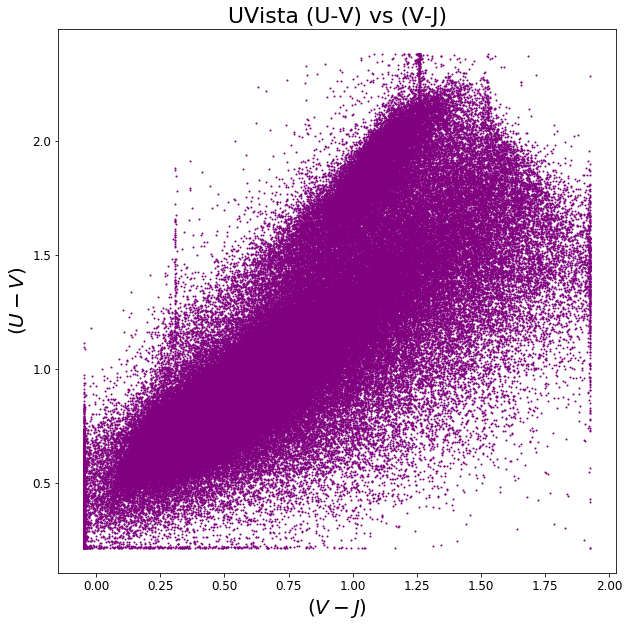

In [23]:
# Plot (U-V) vs. V

f, ax = plt.subplots(figsize=(10,10))
# ax.scatter(MV[np.where(zarr < 1.)], UVcolor[np.where(zarr < 1.)], s=1, c='purple')
# ax.scatter(VJcolor[np.where((zarr1 > 0.5) & (zarr1 > 1.))], UVcolor[np.where((zarr1 > 0.5) & (zarr1 > 1.))], s=1, c='purple')
ax.scatter(VJcolor1, UVcolor1, s=1, c='purple')
plt.title("UVista (U-V) vs (V-J)", fontsize=22)
plt.xlabel(r'$(V-J)$', fontsize=20)
plt.ylabel(r'$(U-V)$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.gca().invert_xaxis()
# plt.legend(loc='lower right', fontsize=15, markerscale=5)
# plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v2.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v2.pdf')
plt.show()

In [ ]:
# calculate rest-frame magnitudes

K_correct = -2.5*np.log10((1. + zphot)**-1.)
print(len(K_correct))
# print(len(zphot[np.where(zmag <= 22.36)]))
# print(len(rmag_LRG[np.where(zmag_LRG <= 22.36)]))

Mr = rmag - DM_new - K_correct
print(len(Mr))
# Mg = gmag - DM_cut - K_correct

# calculate UltraVISTA luminosities 

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

print(len(L_r[np.where(L_r == 0.)]))

log_Lr_all = np.log10(L_r)
print(len(log_Lr_all))


In [ ]:
log_Lr_blue_LS = log_Lr_all[np.where((UVcolor < 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65) & (zmag < 22.36))]
log_Lr_red_LS = log_Lr_all[np.where((UVcolor > 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65) & (zmag < 22.36))]

log_Lr_blue_z = log_Lr_all[np.where((UVcolor < 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65))]
log_Lr_red_z = log_Lr_all[np.where((UVcolor > 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65))]
   
    
print(len(log_Lr_blue_LS))
print(len(log_Lr_red_LS))
print(len(log_Lr_blue_z))
print(len(log_Lr_red_z))

In [ ]:
UV_zcut_red, zcut_bins_red = np.histogram(log_Lr_red_z, bins=50)
UV_LScut_red, nouse_bins = np.histogram(log_Lr_red_LS, bins=zcut_bins_red)
print(zcut_bins_red)
print('----')
# print(LScut_bins)

ratio_red = UV_LScut_red/UV_zcut_red
print(ratio_red)

plt.subplots(figsize=(10,10))
# plt.hist(log_Lr, bins=30, alpha=0.2, color='purple', label="Full UV", normed='True')
plt.hist(log_Lr_red_z, bins=20, alpha=0.2, color='green') #, label="UV with Redshift Cuts")
plt.hist(log_Lr_red_LS, bins=zcut_bins_red, alpha=0.1, color='blue') #, label="UV with Legacy Survey Cuts")
plt.title("UltraVISTA Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.pdf')
plt.show()

bins_minus_one = [8.66202823,  8.73167582,  8.8013234,   8.87097099,  8.94061858,
  9.01026616,  9.07991375,  9.14956134,  9.21920892,  9.28885651,  9.3585041,
  9.42815168,  9.49779927,  9.56744686,  9.63709444,  9.70674203,  9.77638962,
  9.8460372,   9.91568479,  9.98533238, 10.05497996, 10.12462755, 10.19427514,
 10.26392272, 10.33357031, 10.4032179,  10.47286548, 10.54251307, 10.61216066,
 10.68180824, 10.75145583, 10.82110342, 10.890751,   10.96039859, 11.03004618,
 11.09969376, 11.16934135, 11.23898894, 11.30863652, 11.37828411, 11.4479317,
 11.51757928, 11.58722687, 11.65687446, 11.72652204, 11.79616963, 11.86581722,
 11.9354648,  12.00511239]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_red[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (red)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_red-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_red-v1.pdf')
fig.show()


In [ ]:
UV_zcut_blue, zcut_bins_blue = np.histogram(log_Lr_blue_z, bins=50)
UV_LScut_blue, nouse_bins = np.histogram(log_Lr_blue_LS, bins=zcut_bins_blue)
print(zcut_bins_blue)
print('----')
# print(LScut_bins)

ratio_blue = UV_LScut_blue/UV_zcut_blue
print(ratio_blue)

plt.subplots(figsize=(10,10))
# plt.hist(log_Lr, bins=30, alpha=0.2, color='purple', label="Full UV", normed='True')
plt.hist(log_Lr_blue_z, bins=50, alpha=0.3, color='green') #, label="UV with Redshift Cuts")
plt.hist(log_Lr_blue_LS, bins=zcut_bins_blue, alpha=0.2, color='blue') #, label="UV with Legacy Survey Cuts")
plt.title("UltraVISTA Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.pdf')
plt.show()

bins_minus_one = [8.99501123,  9.06463806,  9.13426489,  9.20389173,  9.27351856,
  9.34314539,  9.41277222,  9.48239906,  9.55202589,  9.62165272,  9.69127956,
  9.76090639,  9.83053322,  9.90016006,  9.96978689, 10.03941372, 10.10904056,
 10.17866739, 10.24829422, 10.31792106, 10.38754789, 10.45717472, 10.52680156,
 10.59642839, 10.66605522, 10.73568206, 10.80530889, 10.87493572, 10.94456256,
 11.01418939, 11.08381622, 11.15344306, 11.22306989, 11.29269672, 11.36232356,
 11.43195039, 11.50157722, 11.57120406, 11.64083089, 11.71045772, 11.78008456,
 11.84971139, 11.91933822, 11.98896506, 12.05859189, 12.12821872, 12.19784556,
 12.26747239, 12.33709922]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_blue[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (blue)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_blue-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_blue-v1.pdf')
fig.show()